In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from matplotlib import rcParams
import os

In [9]:
def load_data(file_path):
    """Load data and return processed DataFrame"""
    df = pd.read_csv(file_path)
    # Handle potential whitespace in column names
    df.columns = df.columns.str.strip()
    # Calculate number of diseases per sample (for subsequent analysis)
    disease_cols = df.columns[2:]  # Exclude ID and Disease_Risk
    df['disease_count'] = df[disease_cols].sum(axis=1)
    return df, disease_cols

In [10]:
file_path = "E:/eyes__disease/dataset/Training_Set/RFMiD_Training_Labels.csv"
df, disease_cols = load_data(file_path)

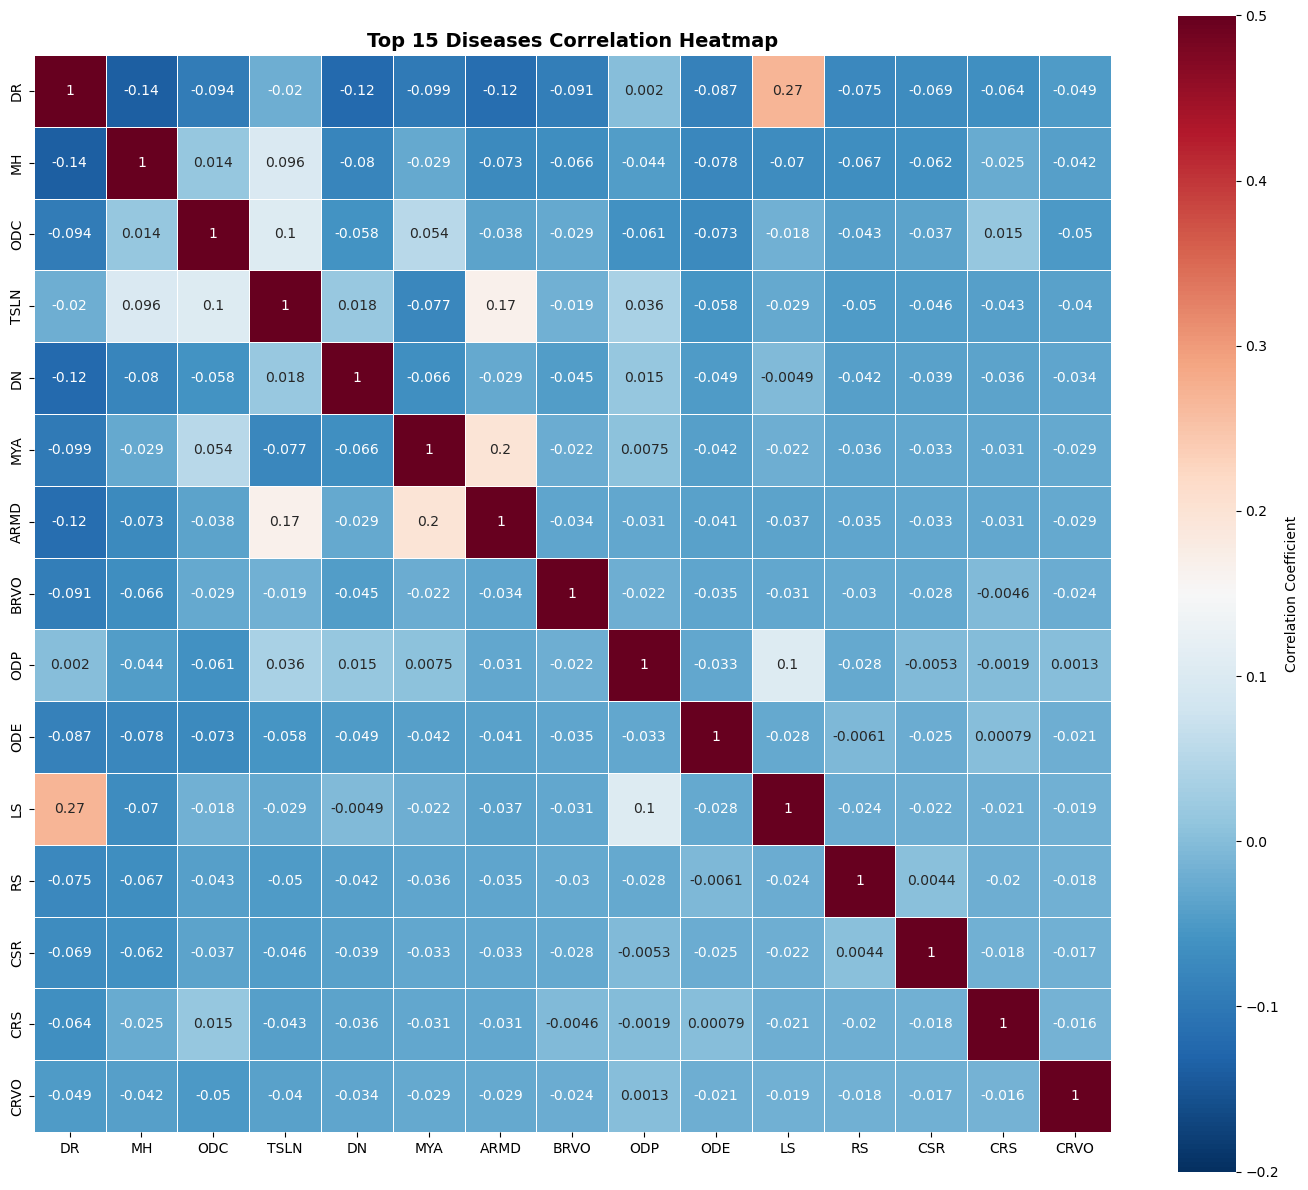

In [ ]:
top15_diseases = df[disease_cols].sum().nlargest(15).index
corr_matrix = df[top15_diseases].corr() 

plt.figure(figsize=(14, 12), facecolor='white')
sns.heatmap(
    corr_matrix,
    annot=True,          
    cmap='RdBu_r',       
    vmin=-0.2, vmax=0.5, 
    square=True,        
    linewidths=0.5,      
    cbar_kws={'label': 'Correlation Coefficient'}  
)
plt.title('Top 15 Diseases Correlation Heatmap', fontsize=14, fontweight='bold')
plt.tight_layout()  

if not os.path.exists('pictures'):
    os.makedirs('pictures')
plt.savefig('pictures/diseases_correlation_heatmap.png', bbox_inches='tight', facecolor='white')
plt.show() 
plt.close()  

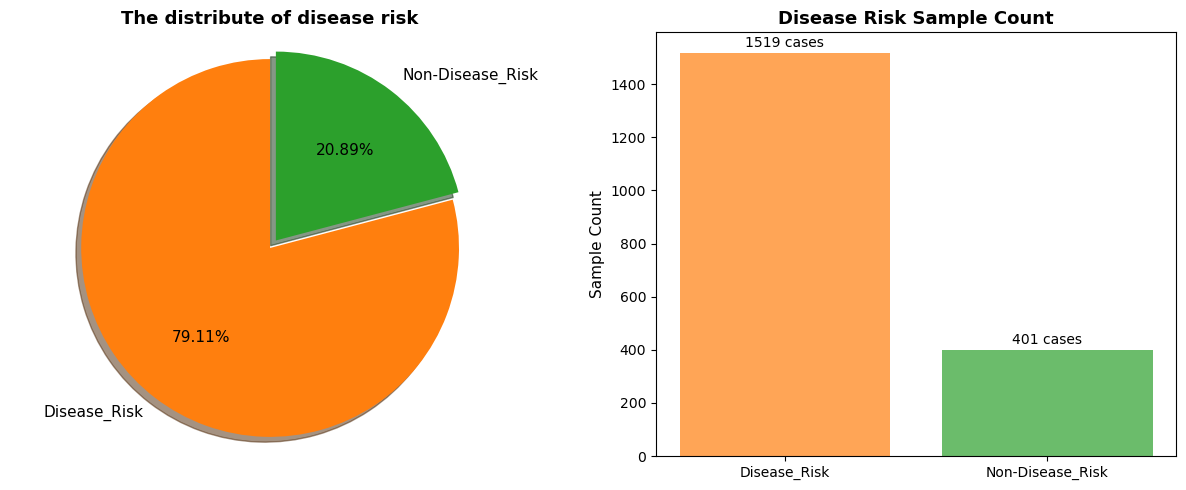

Disease risk distribution chart generated! Disease risk: 1519 cases (79.11%), No disease risk: 401 cases (20.89%)


In [22]:
df.columns = df.columns.str.strip()  
risk_series = df['Disease_Risk']
risk_counts = risk_series.value_counts() 
labels = ['Disease_Risk', 'Non-Disease_Risk']
values = [risk_counts[1], risk_counts[0]] 
percentages = [f'{v/sum(values)*100:.2f}%' for v in values] 


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
colors = ['#ff7f0e', '#2ca02c']
explode = (0.05, 0)  
plt.pie(values, labels=labels, colors=colors, explode=explode,
        autopct=lambda p: f'{p:.2f}%',  
        shadow=True, startangle=90, textprops={'fontsize': 11})
plt.title('The distribute of disease risk', fontsize=13, fontweight='bold')
plt.axis('equal')


plt.subplot(1, 2, 2)
bars = plt.bar(labels, values, color=colors, alpha=0.7)
plt.title('Disease Risk Sample Count', fontsize=13, fontweight='bold')
plt.ylabel('Sample Count', fontsize=11)
for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height + 10,
                f'{int(height)} cases', ha='center', va='bottom', fontsize=10)
plt.tight_layout()  # Adjust layout
plt.savefig('pictures/Disease_Risk_Distribution.png', bbox_inches='tight')
plt.show()
plt.close()

print(f"Disease risk distribution chart generated! Disease risk: {values[0]} cases ({percentages[0]}), No disease risk: {values[1]} cases ({percentages[1]})")

即将统计的疾病列： ['DR', 'ARMD', 'MH', 'DN', 'MYA', 'BRVO', 'TSLN', 'ERM', 'LS', 'MS', 'CSR', 'ODC', 'CRVO', 'TV', 'AH', 'ODP', 'ODE', 'ST', 'AION', 'PT', 'RT', 'RS', 'CRS', 'EDN', 'RPEC', 'MHL', 'RP', 'CWS', 'CB', 'ODPM', 'PRH', 'MNF', 'HR', 'CRAO', 'TD', 'CME', 'PTCR', 'CF', 'VH', 'MCA', 'VS', 'BRAO', 'PLQ', 'HPED', 'CL']


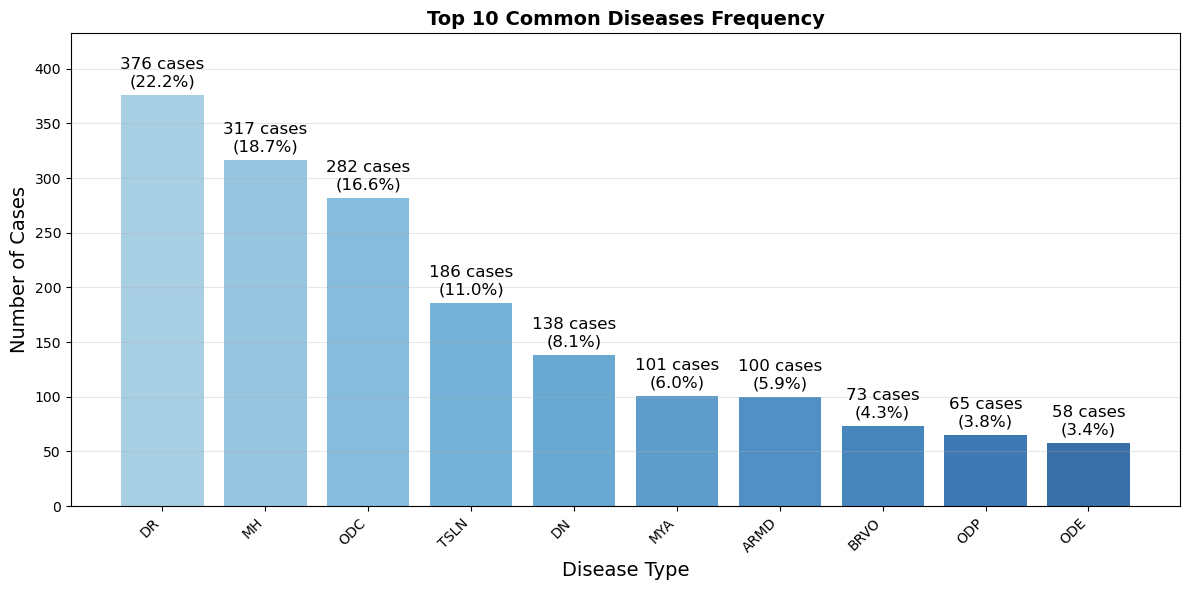


Top 10 Common Diseases Frequency chart generated! Top 5 diseases:
1. DR：376例
2. MH：317例
3. ODC：282例
4. TSLN：186例
5. DN：138例


In [31]:
df.columns = df.columns.str.strip()  # 去除列名空格

# ---------------------- 关键修改：过滤非疾病列 ----------------------
disease_cols = df.columns[2:]  # 先取第3列及以后
# 过滤掉名称包含"count"、"sum"等非疾病列（根据你的数据列名调整过滤规则）
disease_cols = [col for col in disease_cols if not any(keyword in col.lower() for keyword in ['count', 'sum', 'total'])]
# 进一步确保：疾病列是二进制标签（0=无，1=有），过滤掉非二进制列（避免统计错误）
disease_cols = [col for col in disease_cols if df[col].nunique() <= 2]

# 验证：打印所有要统计的疾病列，确认没有异常列
print("即将统计的疾病列：", disease_cols)

# 后续逻辑不变（但基于过滤后的疾病列）
disease_df = df[disease_cols]
disease_counts = disease_df.sum().sort_values(ascending=False)
top_n = 10
top_diseases = disease_counts.head(top_n)

# 绘图代码（不变）
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_diseases)))
bars = plt.bar(top_diseases.index, top_diseases.values, color=colors, alpha=0.8)

plt.title(f'Top {top_n} Common Diseases Frequency', fontsize=14, fontweight='bold')
plt.xlabel('Disease Type', fontsize=14)
plt.ylabel('Number of Cases', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

max_height = top_diseases.values.max()
plt.ylim(0, max_height * 1.15)

# 添加标签
total_cases = top_diseases.sum()
for bar in bars:
    height = bar.get_height()
    pct = height / total_cases * 100
    plt.text(bar.get_x() + bar.get_width()/2, height + 5,
            f'{int(height)} cases\n({pct:.1f}%)', 
            ha='center', va='bottom', fontsize=12)

plt.tight_layout()  
plt.savefig(f'pictures/Top{top_n}_Common_Diseases_Frequency.png', bbox_inches='tight')
plt.show()
plt.close()

# 输出Top5疾病
print(f"\nTop {top_n} Common Diseases Frequency chart generated! Top 5 diseases:")
for i, (disease, count) in enumerate(top_diseases.head(5).items(), 1):
    print(f"{i}. {disease}：{count}例")

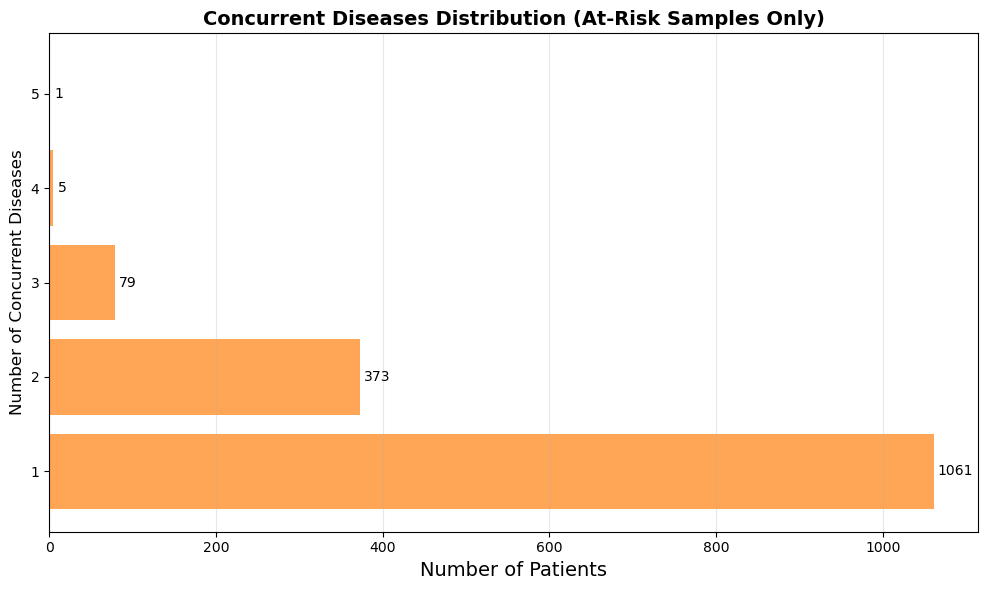

In [27]:
concurrent_counts = df[df['Disease_Risk']==1]['disease_count'].value_counts().sort_index()

plt.figure(figsize=(10, 6)) 
bars = plt.barh(concurrent_counts.index, concurrent_counts.values, color='#ff7f0e', alpha=0.7)
plt.title('Concurrent Diseases Distribution (At-Risk Samples Only)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Patients', fontsize=14) 
plt.ylabel('Number of Concurrent Diseases', fontsize=12)
plt.yticks(concurrent_counts.index)  
plt.grid(axis='x', alpha=0.3)  

for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2.,
            f'{int(width)}', ha='left', va='center', fontsize=10)

plt.tight_layout()
plt.savefig('pictures/concurrent_diseases_horizontal_bar.png', bbox_inches='tight')
plt.show()
plt.close()